In [ ]:
!pip install dc_stat_think

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import random
import seaborn as sns
import dc_stat_think as dcst
import statsmodels.api as sm
import math
import statistics
import math

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files

In [ ]:
sns.set()

METODA ODWROTNEJ DYSTRYBUANTY

Rozkład dyskretny

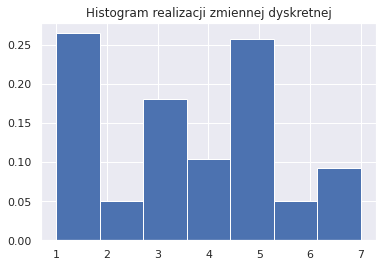

In [ ]:
def odwr_dystr_dyskretny(n):
    X = np.random.random(n) 
    X = 1 + 1*(X > 0.25) + 1*(X > 0.3) + 1*(X > 0.5) + 1*(X > 0.6) + 1*(X > 0.86) + 1*(X > 0.9) 
    return X
X = odwr_dystr_dyskretny(1000)
plt.hist(X,bins=7,weights=np.ones(1000) / 1000)
plt.title("Histogram realizacji zmiennej dyskretnej")
plt.savefig("odwr_dystr_dyskretny.png")

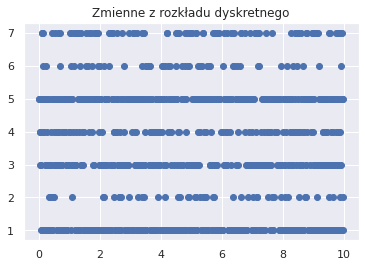

In [ ]:
plt.scatter(np.arange(0, 10, 0.01), X)
plt.title("Zmienne z rozkładu dyskretnego")
plt.savefig("odwr_dystr_dyskretny_scatter.png")

In [ ]:
Y = odwr_dystr_dyskretny(10**6)
print(Y)
statistics.mean(Y)

[1 7 4 ... 5 5 1]


3

Rozkład ciągły -Cauchy

In [ ]:
def odwr_dystr_cauchy(x, m, a):
  return a * math.tan(math.pi*(x - 0.5)) + m

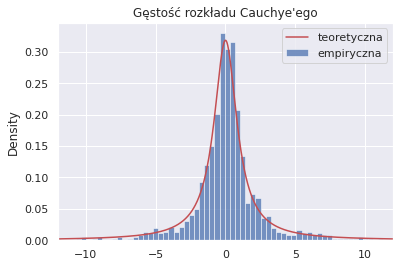

In [ ]:
cauchy1 = [odwr_dystr_cauchy(np.random.rand(), 0, 1) for i in range(1,1001)]
x = np.arange(-12,12,0.01)
plt.plot(x, scipy.stats.cauchy.pdf(x, 0,1),color ='r', label="teoretyczna")
plt.title("Gęstość rozkładu Cauchye'ego")
plt.xlim(-12,12)
sns.histplot(cauchy1, kde=False, stat='density', label="empiryczna")
plt.legend()
plt.savefig("odwr_dystr_ciagly_gestosc.png")

In [ ]:
len(cauchy1)

1000

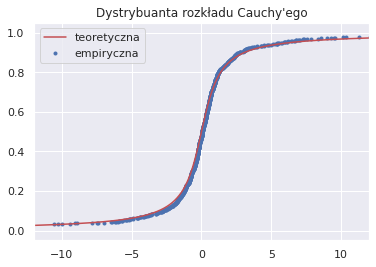

In [ ]:
arg, val  = dcst.ecdf(cauchy1)
plt.scatter(arg,val,marker=".", label = "empiryczna")
plt.xlim(-12,12)
plt.plot(np.arange(-12,12,0.01),scipy.stats.cauchy.cdf(np.arange(-12,12,0.01)), color="r", label="teoretyczna")
plt.legend()
plt.title("Dystrybuanta rozkładu Cauchy'ego")
plt.savefig("odwr_dystr_ciagly_dystr.png")

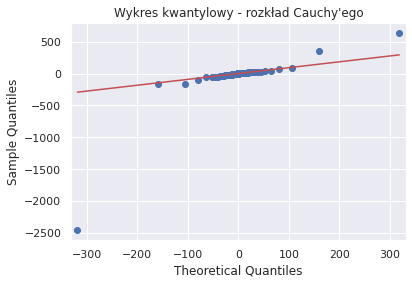

In [ ]:
sm.qqplot(np.array(cauchy1),  dist='cauchy', line='q');
plt.title("Wykres kwantylowy - rozkład Cauchy'ego")
plt.savefig("odwr_dystr_ciagly_qq.png")

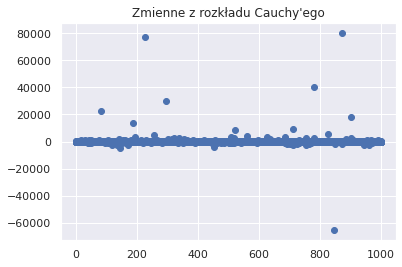

In [ ]:
plt.scatter(np.arange(0,1000, 0.01), [odwr_dystr_cauchy(np.random.rand(), 0, 1) for i in range(1,100001)])
plt.title("Zmienne z rozkładu Cauchy'ego")

plt.savefig("odwr_dystr_ciagly_scatter.png")

METODA AKCEPTACJI - ODRZUCENIA

Rozkład dyskretny

In [ ]:
c = 0.35*6
def prawdo(X):
    if X == 1:
        return 0.2
    elif X == 2:
        return 0.05
    elif X == 3:
        return 0.35
    elif X == 4:
        return 0.1
    elif X == 5:
        return 0.18
    else:
        return 0.12

In [ ]:
def akc_odrz_dyskr():
    while True:
        Y = int(math.ceil(6*np.random.rand()))
        U = np.random.rand()
        if U <= prawdo(Y)/(c)/(1/6):
            return Y

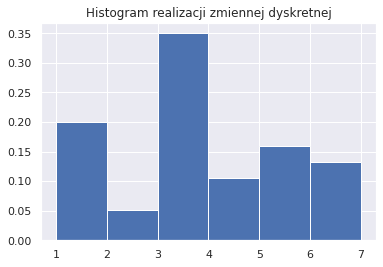

In [ ]:
X = [akc_odrz_dyskr() for i in range (1,1001)]
plt.hist(X, bins=[1,2,3,4,5,6,7], density=True)
plt.title("Histogram realizacji zmiennej dyskretnej")
plt.savefig("akc_odrz_dyskretny.png")
plt.show()

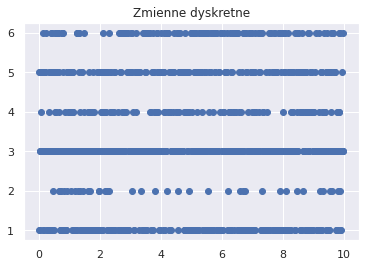

In [ ]:
plt.scatter(np.arange(0, 10, 0.01), [akc_odrz_dyskr() for i in range (1,1001)])
plt.title("Zmienne dyskretne")
plt.savefig("akc_odrz_dyskr_scatter.png")

In [ ]:
statistics.mean(X)

3.374

Rozkład ciągły - Gamma()

In [ ]:
def gamma(x):
    return (4/3) * np.exp(-2*x)*x**4

In [ ]:
def wyk(x, lamb):
  return lamb * np.exp(-lamb * x)

2.6662785637768156


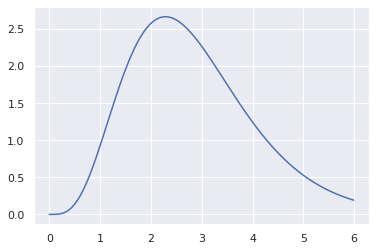

In [ ]:
lamb = 2
def h(x):
    return gamma(x)/wyk(x, 1/4)
xs=np.arange(0, 6 ,0.01)
plt.plot(xs, h(xs))
print(h(xs).max())

In [ ]:
c = h(xs).max()
print(c)

2.6662785637768156


In [ ]:
def akc_odrz_ciagly():
  while True:
        Y = np.random.exponential(4)
        U = np.random.rand()
        if U <= gamma(Y)/(c*wyk(Y, 1/4)):
            return Y

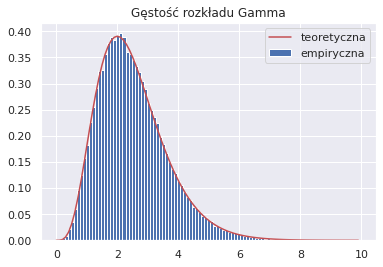

In [ ]:
plt.hist([akc_odrz_ciagly() for i in range (1,100001)], bins=100, density=True, label = 'empiryczna')
plt.plot(np.arange(0, 10, 0.1), [gamma(x) for x in np.arange(0, 10, 0.1)], color='r', label = 'teoretyczna')
plt.title("Gęstość rozkładu Gamma")
plt.savefig("akc_odrz_ciagly_gestosc.png")
plt.legend()
plt.show()

In [ ]:
gam = [akc_odrz_ciagly() for i in range (1,100001)]
arg, val = dcst.ecdf(gam)

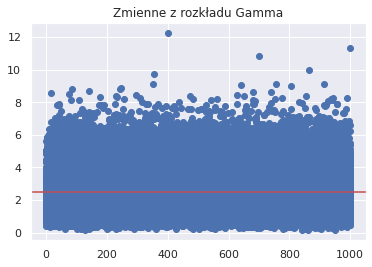

In [ ]:
plt.scatter(np.arange(0, 1000, 0.01), [akc_odrz_ciagly() for i in range (1,100001)])
plt.title("Zmienne z rozkładu Gamma")
plt.axhline(y=statistics.mean(gam), color='r', linestyle='-')
plt.savefig("akc_odrz_ciagly_scatter.png")

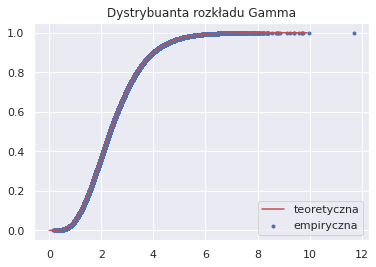

In [ ]:
plt.scatter(arg,val,marker=".", label = "empiryczna")
plt.plot(np.arange(0, 10, 0.1), scipy.stats.gamma.cdf(np.arange(0, 10, 0.1), a=5, scale=1/2), color='r', label ='teoretyczna')
plt.title("Dystrybuanta rozkładu Gamma")
plt.savefig("akc_odrz_ciagly_dystr.png")
plt.legend()

In [ ]:
scipy.stats.gamma.fit(gam)

(4.902589236243182, 0.028683456558882492, 0.5044927326718371)

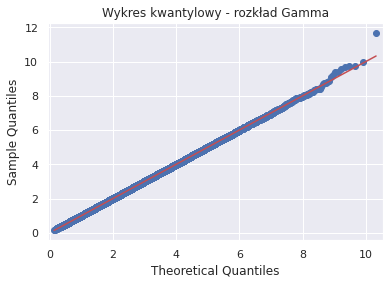

In [ ]:
sm.qqplot(np.array(gam),  dist=scipy.stats.gamma, line='q', distargs=(5,), scale=0.5);
plt.title("Wykres kwantylowy - rozkład Gamma")
plt.savefig("akc_odrz_ciagly_qq.png")

In [ ]:
statistics.mean(gam)

2.502004946159948

In [ ]:
5/2
#alfa/lambda

2.5

In [ ]:
5/(2**2)
#alfa/lmabda^2

1.25

In [ ]:
statistics.variance(gam)

1.2458149660951474

METODA SPLOTOWA


Rozkład dyskretny - dwumianowy

In [ ]:
def bernoulli(n, p):
  U = np.random.uniform(0,1,n)
  X = sum(U <=p )
  return X

In [ ]:
def rozklad_bernoulli(n, p):
  l = []
  for i in range(1,n+1):
    l.append(scipy.special.comb(n, i)*p**i*(1-p)**(n-i))
  return l

In [ ]:
bern = [bernoulli(500, 0.1) for i in range (1,10001)]

In [ ]:
len(bern)
len(np.arange(0,100,0.01))

10000

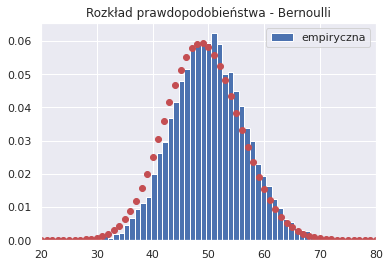

In [ ]:
plt.hist(bern, bins=50, density=True, label = 'empiryczna')
plt.plot(np. arange(0,500,1), rozklad_bernoulli(500, 0.1), 'bo', color='r')
plt.xlim(20,80)
plt.title("Rozkład prawdopodobieństwa - Bernoulli")
plt.savefig("splotowa_dyskr_gestosc.png")
plt.legend()
plt.show()

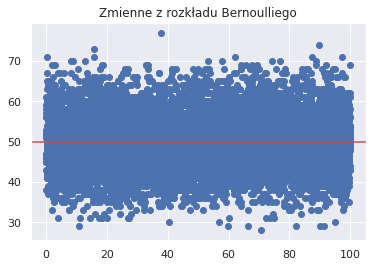

In [ ]:
plt.scatter(np.arange(0, 100, 0.01), bern)
plt.title("Zmienne z rozkładu Bernoulliego")
plt.axhline(y=statistics.mean(bern), color='r', linestyle='-')
plt.savefig("splotowa_dyskr_scatter.png")

In [ ]:
statistics.mean(bern)

50

In [ ]:
500 * 0.1

50.0

In [ ]:
statistics.variance(bern)

44

In [ ]:
500*0.1*(1-0.1)

45.0

Rozkład ciągły - Erlanga

In [ ]:
def erlanga(n, lambd):
  U = np.random.uniform(0,1,n)
  X = sum(-np.log(U)/lambd)
  return X

In [ ]:
print(erlanga(1000, 3))

347.4550979297158


In [ ]:
import math
def gestosc_erlanga(x, n, l):
  return (((l*x)**(n-1))/(math.factorial(n-1)))*l*np.exp(-l * x)

In [ ]:
def dystr_erlanga(x, n, l):
    a = 1
    for i in range(0,n):
        a -= np.exp(-l*x)*(l*x)**i*(1/math.factorial(i))
    return a

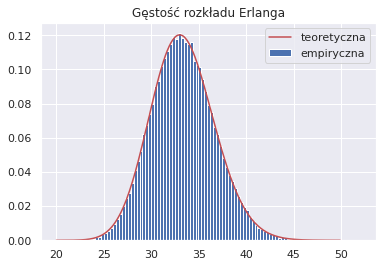

In [ ]:
erl = [erlanga(100, 3) for i in range (1,100000)]
plt.hist(erl, bins=100, density=True, label = 'empiryczna')
plt.plot(np.arange(20, 50, 0.1), [gestosc_erlanga(x, 100, 3) for x in np.arange(20, 50, 0.1)], color='r', label = 'teoretyczna')
plt.title("Gęstość rozkładu Erlanga")
plt.savefig("splotowa_ciagly_gestosc.png")
plt.legend()
plt.show()

In [ ]:
arg, val = dcst.ecdf(erl)

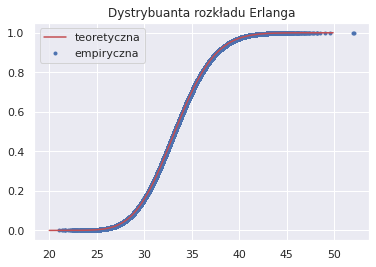

In [ ]:
plt.scatter(arg,val,marker=".", label = "empiryczna")
plt.plot(np.arange(20, 50, 0.1), [dystr_erlanga(x, 100, 3) for x in np.arange(20, 50, 0.1)], color='r', label = 'teoretyczna')
plt.title("Dystrybuanta rozkładu Erlanga")
plt.savefig("splotowa_ciagly_dystr.png")
plt.legend()

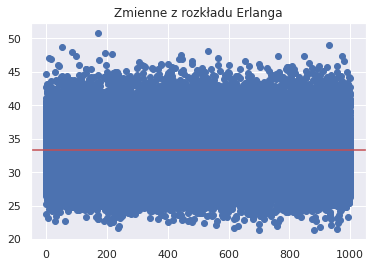

In [ ]:
plt.scatter(np.arange(0, 1000, 0.01), [erlanga(100, 3) for i in range (1,100001)])
plt.title("Zmienne z rozkładu Erlanga")
plt.axhline(y=statistics.mean(erl), color='r', linestyle='-')
plt.savefig("splotowa_ciagly_scatter.png")

In [ ]:
statistics.mean(erl)

33.33818919040294

In [ ]:
100/3

33.333333333333336

In [ ]:
statistics.variance(erl)

11.146386680672531

In [ ]:
100/9

11.11111111111111

METODA KOMPOZYCJI

In [ ]:
def laplace(lambd):
    Exp = (-np.log(np.random.rand()))/lambd
    U = np.random.rand()
    if U < 0.5:
      l = (Exp)
    else:
      l = (-1*Exp)
    return l

In [ ]:
def gestosc_laplace(x, lambd):
    return (lambd/2)*np.exp(-lambd*abs(x))

In [ ]:
def dystr_laplace(x, lambd):
    if x <= 0:
      return 0.5*np.exp(lambd * x)
    else:
      return 1-0.5*np.exp(-lambd * x)

In [ ]:
lap = [laplace(3) for i in range (1,100000)]

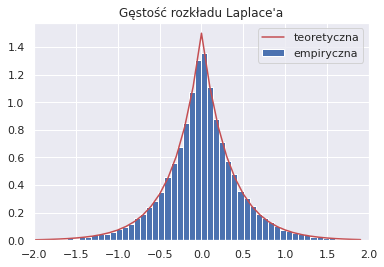

In [ ]:
plt.hist(lap, bins=100, density=True, label = 'empiryczna')
plt.plot(np.arange(-2,2, 0.1), [gestosc_laplace(x, 3) for x in np.arange(-2,2, 0.1)], color='r', label = 'teoretyczna')
plt.xlim(-2,2)
plt.title("Gęstość rozkładu Laplace'a")
plt.savefig("kompozycji_ciagly_gestosc.png")
plt.legend()
plt.show()

In [ ]:
arg, val = dcst.ecdf(lap)

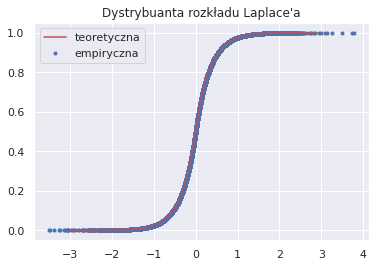

In [ ]:
plt.scatter(arg,val,marker=".", label = "empiryczna")
plt.plot(np.arange(-3,3, 0.1), [dystr_laplace(x, 3) for x in np.arange(-3, 3, 0.1)], color='r', label = 'teoretyczna')
plt.title("Dystrybuanta rozkładu Laplace'a")
plt.savefig("kompozycji_ciagly_dystr.png")
plt.legend()

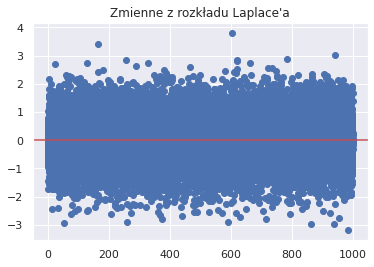

In [ ]:
plt.scatter(np.arange(0, 1000, 0.01), [laplace(3) for i in range (1,100001)])
plt.title("Zmienne z rozkładu Laplace'a")
plt.axhline(y=statistics.mean(lap), color='r', linestyle='-')
plt.savefig("kompozycji_ciagly_scatter.png")

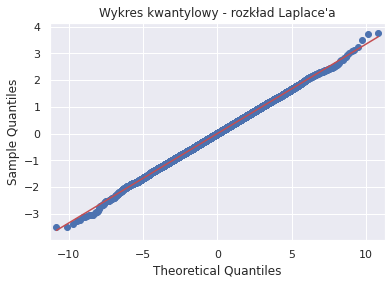

In [ ]:
sm.qqplot(np.array(lap), dist = scipy.stats.laplace, line='q');
plt.title("Wykres kwantylowy - rozkład Laplace'a")
plt.savefig("kompozycji_ciagly_qq.png")

In [ ]:
statistics.mean(lap)

0.001347194611485462

In [ ]:
statistics.variance(lap)

0.22228916293496764

In [ ]:
2/9

0.2222222222222222

ROZKŁADY NORMALNE


Boxa - Mullera

In [ ]:
def box_muller(n, mi, sigma):
    U_1 = np.random.uniform(0,1,n)
    U_2 = np.random.uniform(0,1,n)
    X = np.sqrt(-2*np.log(U_1)) * np.cos(2*np.pi*U_2)
    Y = np.sqrt(-2*np.log(U_1)) * np.sin(2*np.pi*U_2)
    X_tr = sigma*X+mi
    Y_tr = sigma*Y+mi
    all_values = np.concatenate((X_tr, Y_tr))
      
    return all_values

In [ ]:
def gestosc_norm(x, mi, sigma):
  return (1/(np.sqrt(2*np.pi*sigma**2)))*np.exp(-((x-mi)**2)/(2*sigma**2))

In [ ]:
def dystr_norm(x, mi, sigma):
  return 1/2*(1+scipy.special.erf((x-mi)/(sigma*np.sqrt(2))))

In [ ]:
mi = 3
sigma = 2

In [ ]:
box_mull = box_muller(10**6, mi,sigma)

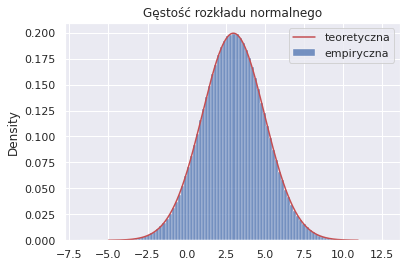

In [ ]:
xs = np.arange(mi-4*sigma,mi+4*sigma,0.01)
plt.plot(xs, gestosc_norm(xs, mi, sigma), color = 'r', label = 'teoretyczna')
sns.histplot(box_mull, bins=100, stat = "density", kde = False, label = 'empiryczna')
plt.title("Gęstość rozkładu normalnego")
plt.legend()
plt.savefig("boxa_gestosc.png")

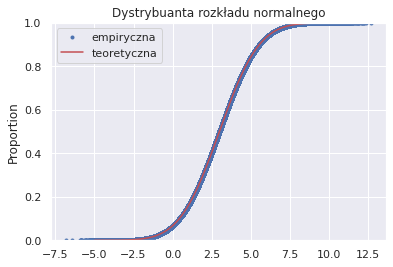

In [ ]:
sns.ecdfplot(box_mull, label="empiryczna", marker = '.', ls='none')
plt.plot(xs, dystr_norm(xs, mi, sigma), color = 'r', label = 'teoretyczna')
plt.title("Dystrybuanta rozkładu normalnego")
plt.legend()
plt.savefig("boxa_dystr.png")

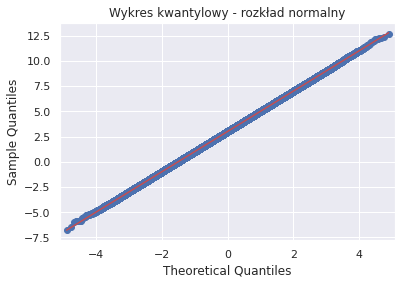

In [ ]:
sm.qqplot(box_mull, dist = scipy.stats.norm, line='q');
plt.title("Wykres kwantylowy - rozkład normalny")
plt.savefig("boxa_qq.png")

In [ ]:
len( box_muller(1000000, mi,sigma))

2000000

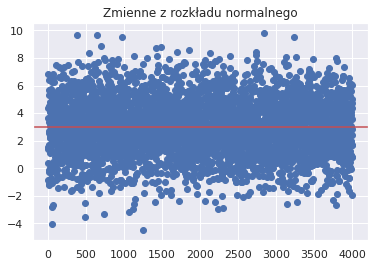

In [ ]:
plt.scatter(np.arange(0, 4000), box_muller(2000, mi,sigma))
plt.title("Zmienne z rozkładu normalnego")
plt.axhline(y=statistics.mean(box_mull), color='r', linestyle='-')
plt.savefig("box_scatter.png")

In [ ]:
statistics.mean(box_mull)

3.0021025896646543

In [ ]:
statistics.variance(box_mull)
#jest git bo to sigma^2 czyli 2^2

3.9906695015630786

Metoda biegunowa

In [ ]:
def met_bieg(n, mi, sigma):
    X = np.ndarray(n)
    Y = np.ndarray(n)
    i = 0
    while i < n:
          V1 = random.uniform(-1,1)
          V2 = random.uniform(-1,1)
          R = V1**2 + V2**2
          if R <= 1:
              X[i] = np.sqrt((-2*np.log(R))/R)*V1
              Y[i] = np.sqrt((-2*np.log(R))/R)*V2
              i += 1
    X_ok = sigma*X+mi
    Y_ok = sigma*Y+mi          
    all = np.concatenate((X_ok, Y_ok))
    return all

In [ ]:
mi2 = 5
sigma2 = 3
xs2 = np.arange(mi2-4*sigma2,mi2+4*sigma2,0.01)

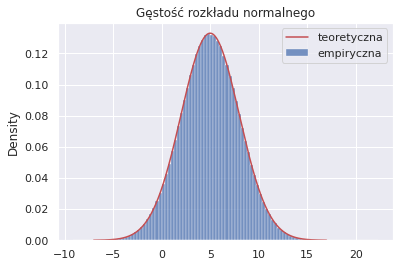

In [ ]:
bieg = met_bieg(10**6, mi2, sigma2)
sns.histplot(bieg, bins=100, stat = "density", kde = False, label = 'empiryczna')
plt.plot(xs2, gestosc_norm(xs2, mi2, sigma2), color = 'r', label = 'teoretyczna')
plt.title("Gęstość rozkładu normalnego")
plt.legend()
plt.savefig("bieg_gestosc.png")

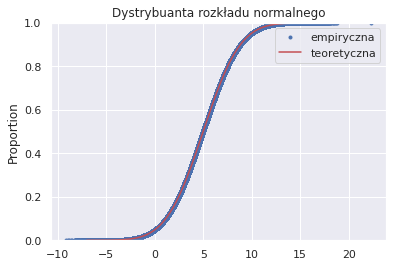

In [ ]:
sns.ecdfplot(bieg, label="empiryczna", marker = '.', ls='none')
plt.plot(xs2, dystr_norm(xs2, mi2, sigma2), color = 'r', label = 'teoretyczna')
plt.title("Dystrybuanta rozkładu normalnego")
plt.legend()
plt.savefig("bieg_dystr.png")

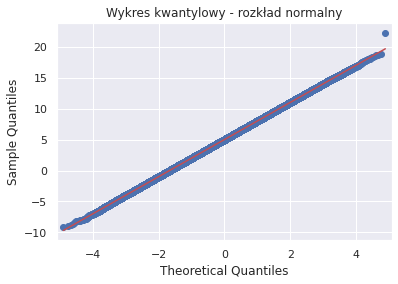

In [ ]:
sm.qqplot(bieg, dist = scipy.stats.norm, line='q');
plt.title("Wykres kwantylowy - rozkład normalny")
plt.savefig("bieg_qq.png")

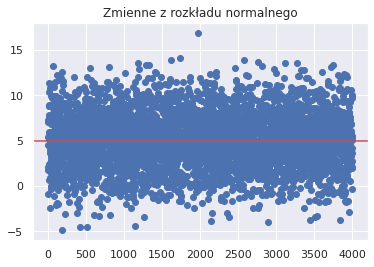

In [ ]:
plt.scatter(np.arange(0, 4000), met_bieg(2000, mi2,sigma2))
plt.title("Zmienne z rozkładu normalnego")
plt.axhline(y=statistics.mean(bieg), color='r', linestyle='-')
plt.savefig("bieg_scatter.png")

In [ ]:
statistics.mean(bieg)

4.996796181682614

In [ ]:
statistics.variance(bieg)
#3^2

9.006087749642774

Generator liczb losowych

In [ ]:
def random_generate(number =1,seed=1410,a=7**2,m=2**31-1 ,c= 5):
    result = np.ndarray(number , np.float64)
    for i in range(number):
        if i == 0:
            result[i] =np.mod(seed *a + c,m)
        else:
         
            result[i] = np.mod(result[i-1] *a + c,m) 
    
    return result / m 

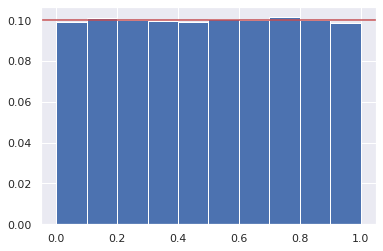

In [ ]:
plt.hist(random_generate(number=10**5),weights=np.ones(10**5)/10**5, label='empiryczna')
plt.axhline(y=0.1, color='r', linestyle='-', label='teoretyczna')